In [1]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# sklearn has 100s of models - grouped in sublibraries, such as linear_model
from sklearn.linear_model import LogisticRegression, LinearRegression

# sklearn has many tools for cleaning/processing data, also grouped in sublibraries
# splitting one dataset into train and test, computing cross validation score, cross validated prediction
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score

#sklearn modules for computing the performance metrics
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, \
roc_curve, auc, precision_score, recall_score, confusion_matrix

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, \
accuracy_score, precision_score, confusion_matrix, mean_squared_error, r2_score

import itertools as it

#Libraries for visualizing trees
from sklearn.tree import export_graphviz 
from six import StringIO
from IPython.display import Image  
import pydotplus
import time as time

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split, KFold, cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score,roc_curve,auc,precision_recall_curve, accuracy_score, \
recall_score, precision_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, StratifiedKFold
from sklearn.ensemble import BaggingRegressor,BaggingClassifier,AdaBoostRegressor,AdaBoostClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
import itertools as it
import time as time

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrix
from sklearn.model_selection import cross_val_score,train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, \
accuracy_score, precision_score, confusion_matrix, mean_squared_error, r2_score
#from pyearth import Earth
from sklearn.linear_model import LinearRegression,LogisticRegression

import itertools as it

#Libraries for visualizing trees
from sklearn.tree import export_graphviz 
from six import StringIO
from IPython.display import Image  
import pydotplus
import time as tm

#Library to compute pair-wise Euclidean distance between all observations in the data
from sklearn import metrics

#Library to impute missing values with the KNN algorithm
from sklearn import impute

from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrix
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_predict, cross_val_score,train_test_split 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold
from mpl_toolkits import mplot3d
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, \
roc_curve, auc, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, StratifiedKFold
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, RandomForestClassifier
import plotly.express as px
from sklearn.impute import KNNImputer

In [2]:
df = pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
imputer = KNNImputer(n_neighbors=5)
imp = imputer.fit_transform(df)
df = pd.DataFrame(imp, columns = df.columns)

In [4]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [5]:
df.shape

(3276, 10)

In [6]:
df['Potability'].value_counts()

0.0    1998
1.0    1278
Name: Potability, dtype: int64

In [7]:
# Separating the predictors and response - THIS IS HOW ALL SKLEARN OBJECTS ACCEPT DATA (different from statsmodels)
y = df.Potability
X = df.drop("Potability", axis = 1)

y_copy= y.copy()
X_copy= X.copy()

In [8]:
# Creating training and test data
    # 80-20 split, which is usual - 70-30 split is also fine, 90-10 is fine if the dataset is large
    # random_state to set a random seed for the splitting - reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

In [9]:
# With linear/logistic regression in scikit-learn, especially when the predictors have different orders 
# of magn., scaling is necessary. This is to enable the training algo. which we did not cover. (Gradient Descent)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) # Do NOT refit the scaler with the test data, just transform it.

In [10]:
X_train_scaled

array([[ 0.44128608,  0.34736318,  0.95638958, ...,  1.45858977,
        -0.90151465, -0.40598764],
       [ 0.68912942,  1.21242039,  0.52785762, ...,  1.29851155,
        -0.51980613, -1.67824987],
       [ 0.70994287, -0.14591261, -0.16625492, ..., -1.49883264,
        -0.57990119,  1.56066899],
       ...,
       [ 0.20408629,  1.25545992, -0.57925969, ..., -0.32837421,
         1.66652752,  1.37132787],
       [-0.69335733, -0.53380584, -1.0062316 , ..., -0.17090053,
        -0.42115009,  1.08324928],
       [ 1.50308893,  0.1627379 , -0.93206086, ..., -0.57840044,
        -1.43646646, -0.44530901]])

## BW here is me trying out smtg new

First I am trying the unscaled data

In [ ]:
model = AdaBoostRegressor(random_state=1)
grid = dict()
grid['estimator'] = [DecisionTreeRegressor(max_depth=5), DecisionTreeRegressor(max_depth=10), 
                          DecisionTreeRegressor(max_depth=15),DecisionTreeRegressor(max_depth=20)] 
grid['n_estimators'] = [1000, 3000, 5000]
grid['learning_rate'] = [0.001, 0.01, 0.1, 1, 2]

# define the evaluation procedure
cv = KFold(n_splits=5, shuffle=True, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv) #, scoring='precision'
# execute the grid search
grid_result = grid_search.fit(X_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" % (mean, stdev, param)

In [18]:
model = AdaBoostRegressor(random_state=1)
grid = dict()
grid['estimator'] = [DecisionTreeRegressor(max_depth=8), DecisionTreeRegressor(max_depth=10), 
                          DecisionTreeRegressor(max_depth=12),DecisionTreeRegressor(max_depth=13)] 
grid['n_estimators'] = [750, 1000, 1500, 2000]
grid['learning_rate'] = [0.005, 0.01, 0.015, 0.02, 0.03]

# define the evaluation procedure
cv = KFold(n_splits=5, shuffle=True, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv) #, scoring='precision'
# execute the grid search
grid_result = grid_search.fit(X_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" % (mean, stdev, param)

Best: 0.095359 using {'estimator': DecisionTreeRegressor(max_depth=10), 'learning_rate': 0.005, 'n_estimators': 2000}


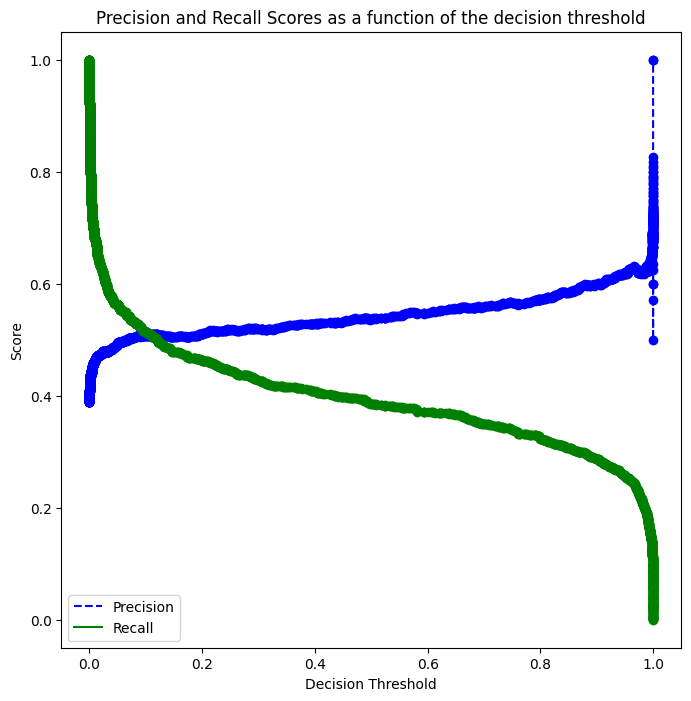

In [21]:
#Model based on the optimal parameters
model = AdaBoostClassifier(random_state=1,estimator = DecisionTreeClassifier(max_depth=10),learning_rate=0.005,
                          n_estimators=2000).fit(X_train,y_train)

# Note that we are using the cross-validated predicted probabilities, instead of directly using the 
# predicted probabilities on train data, as the model may be overfitting on the train data, and 
# may lead to misleading results
cross_val_ypred = cross_val_predict(AdaBoostClassifier(random_state=1,estimator = DecisionTreeClassifier(max_depth=10),learning_rate=0.005,
                          n_estimators=2000), X_train,y_train, cv = 5, method = 'predict_proba')

p, r, thresholds = precision_recall_curve(y_train, cross_val_ypred[:,1])
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.plot(thresholds, precisions[:-1], "o", color = 'blue')
    plt.plot(thresholds, recalls[:-1], "o", color = 'green')
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.legend()
plot_precision_recall_vs_threshold(p, r, thresholds)


In [13]:
# Thresholds with precision and recall
all_thresholds = np.concatenate([thresholds.reshape(-1,1), p[:-1].reshape(-1,1), r[:-1].reshape(-1,1)], axis = 1)
prec_more_than_80 = all_thresholds[all_thresholds[:,1]>0.8,:]
# As the values in 'recall_more_than_80' are arranged in decreasing order of recall and increasing threshold,
# the last value will provide the maximum threshold probability for the recall to be more than 80%
# We wish to find the maximum threshold probability to obtain the maximum possible precision
prec_more_than_80[prec_more_than_80.shape[0]-1]

array([1.00000000e+00, 1.00000000e+00, 9.82318271e-04])

In [14]:
#Optimal decision threshold probability
thres = prec_more_than_80[prec_more_than_80.shape[0]-1][0]
thres

0.9999999999987119

Accuracy:  64.78658536585365
ROC-AUC:  0.6106157731157731
Precision:  0.6013986013986014
Recall:  0.33076923076923076


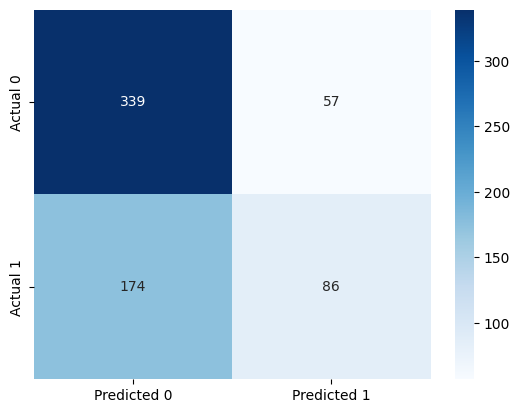

In [22]:
# Performance metrics computation for the optimum decision threshold probability
desired_threshold = 0.8

y_pred_prob = model.predict_proba(X_test)[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_test)*100)  

#Computing the ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_test, y_pred_prob)
print("ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');

## End of smtg new

>10 0.489 (0.073)
>50 0.482 (0.045)
>100 0.472 (0.035)
>500 0.435 (0.010)
>1000 0.419 (0.016)
>5000 0.427 (0.023)


Text(0.5, 0, 'Number of trees')

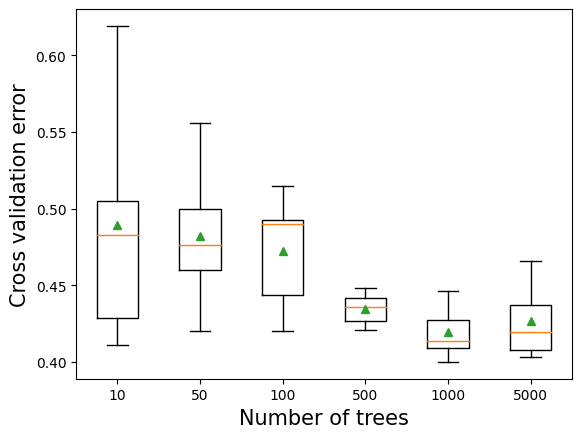

In [35]:
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 1000, 5000]
    for n in n_trees:
        models[str(n)] = AdaBoostClassifier(n_estimators=n,random_state=1)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X_train_scaled, y_train, scoring='precision', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train_scaled, y_train)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('Number of trees',fontsize=15)

>1 0.482 (0.045)
>2 0.507 (0.043)
>3 0.488 (0.028)
>4 0.461 (0.022)
>5 0.448 (0.024)
>6 0.487 (0.043)
>7 0.532 (0.031)
>8 0.524 (0.029)
>9 0.567 (0.043)
>10 0.598 (0.050)
>11 0.541 (0.027)
>12 0.563 (0.029)
>13 0.590 (0.058)
>14 0.578 (0.019)
>15 0.583 (0.028)
>16 0.578 (0.036)
>17 0.585 (0.037)
>18 0.562 (0.049)
>19 0.535 (0.033)
>20 0.509 (0.048)


Text(0.5, 0, 'Depth of each tree')

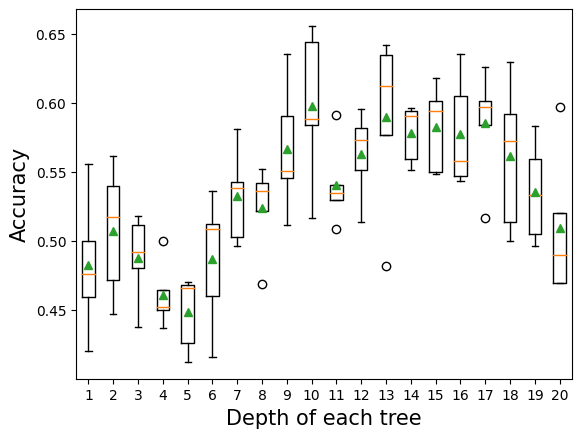

In [36]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore depths from 1 to 10
    for i in range(1,21):
        # define base model
        base = DecisionTreeClassifier(max_depth=i)
        # define ensemble model
        models[str(i)] = AdaBoostClassifier(base_estimator=base)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X_train_scaled, y_train, scoring='precision', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train_scaled, y_train)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Accuracy',fontsize=15)
plt.xlabel('Depth of each tree',fontsize=15)

>0.1 0.619 (0.241)
>0.2 0.569 (0.194)
>0.3 0.552 (0.135)
>0.4 0.539 (0.112)
>0.5 0.527 (0.129)
>0.6 0.519 (0.094)
>0.7 0.513 (0.082)
>0.8 0.520 (0.084)
>0.9 0.499 (0.076)
>1.0 0.506 (0.081)
>1.1 0.477 (0.078)
>1.2 0.521 (0.062)
>1.3 0.479 (0.083)
>1.4 0.501 (0.075)
>1.5 0.490 (0.081)
>1.6 0.472 (0.057)
>1.7 0.507 (0.069)
>1.8 0.506 (0.055)
>1.9 0.464 (0.082)
>2.0 0.378 (0.031)


Text(0.5, 0, 'Learning rate')

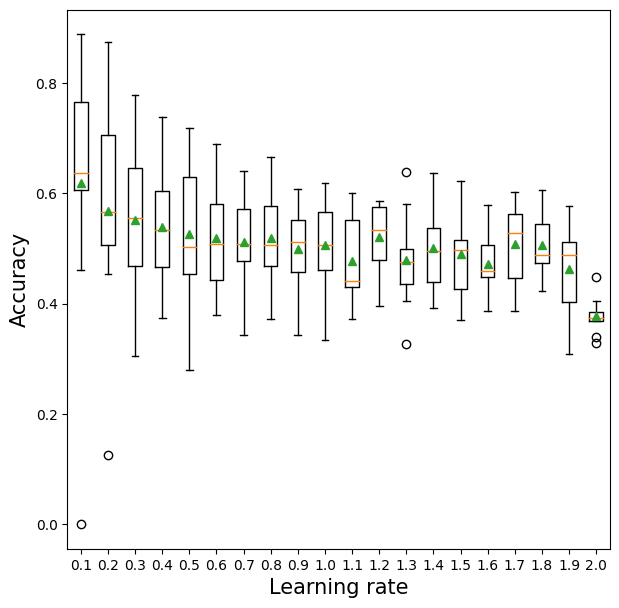

In [37]:
def get_models():
    models = dict()
    # explore learning rates from 0.1 to 2 in 0.1 increments
    for i in np.arange(0.1, 2.1, 0.1):
        key = '%.1f' % i
        models[key] = AdaBoostClassifier(learning_rate=i)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X_train_scaled, y_train, scoring='precision', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train_scaled, y_train)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.figure(figsize=(7, 7))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Accuracy',fontsize=15)
plt.xlabel('Learning rate',fontsize=15)

In [38]:
model = AdaBoostClassifier(random_state=1)
grid = dict()
grid['n_estimators'] = [500, 750, 1000]
grid['learning_rate'] = [0.0001, 0.001, 0.01,0.1, 1.0, 2.0]
grid['base_estimator'] = [DecisionTreeClassifier(max_depth=10), DecisionTreeClassifier(max_depth=12), 
                          DecisionTreeClassifier(max_depth=14),DecisionTreeClassifier(max_depth=16)]
# define the evaluation procedure
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
# define the grid search procedure
grid_search = RandomizedSearchCV(estimator=model, param_distributions=grid, n_jobs=-1, cv=cv, scoring = 'precision',
                          verbose = True)
# execute the grid search
grid_result = grid_search.fit(X_train_scaled, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" % (mean, stdev, param)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best: 0.648243 using {'n_estimators': 750, 'learning_rate': 1.0, 'base_estimator': DecisionTreeClassifier(max_depth=14)}


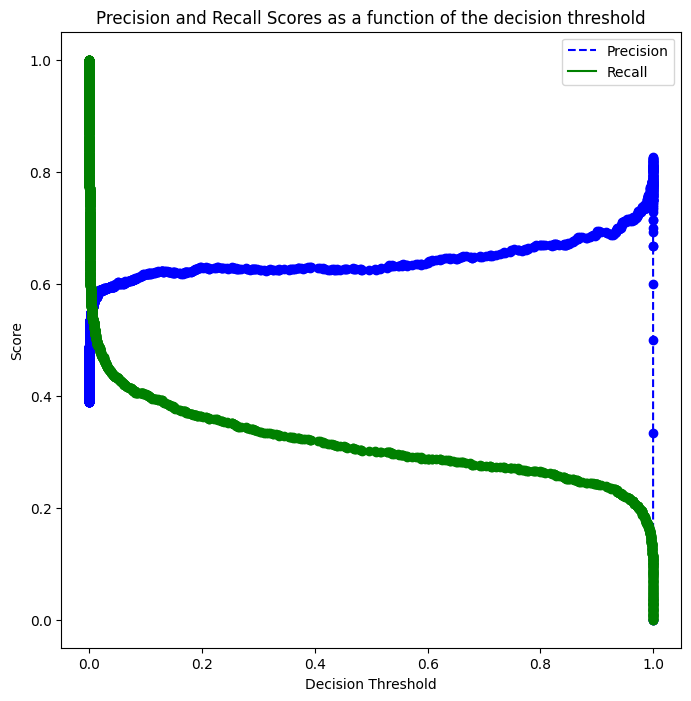

In [43]:
#Model based on the optimal parameters
model = AdaBoostClassifier(random_state=1,estimator = DecisionTreeClassifier(max_depth=14),learning_rate=1.0,
                          n_estimators=750).fit(X_train_scaled, y_train)

# Note that we are using the cross-validated predicted probabilities, instead of directly using the 
# predicted probabilities on train data, as the model may be overfitting on the train data, and 
# may lead to misleading results
cross_val_ypred = cross_val_predict(AdaBoostClassifier(random_state=1,estimator = DecisionTreeClassifier(max_depth=14),
                                                       learning_rate=1.0,
                          n_estimators=750), X_train_scaled, y_train, cv = 5, method = 'predict_proba')

p, r, thresholds = precision_recall_curve(y_train, cross_val_ypred[:, 1])

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.plot(thresholds, precisions[:-1], "o", color = 'blue')
    plt.plot(thresholds, recalls[:-1], "o", color = 'green')
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.legend()
plot_precision_recall_vs_threshold(p, r, thresholds)

In [44]:
# Thresholds with precision and recall
all_thresholds = np.concatenate([thresholds.reshape(-1,1), p[:-1].reshape(-1,1), r[:-1].reshape(-1,1)], axis=1)
recall_more_than_80 = all_thresholds[all_thresholds[:, 2] > 0.8, :]

# Find the maximum threshold probability for the recall to be more than 80%
max_threshold_row = recall_more_than_80[np.argmax(recall_more_than_80[:, 0]), :]

# Set the maximum threshold probability to achieve the desired accuracy
target_accuracy = 0.89
max_threshold_row[0] = thresholds[np.argmax(p[:-1] >= target_accuracy)]

# Print the maximum threshold probability
max_threshold_row


array([9.77610783e-13, 4.80825959e-01, 8.00589391e-01])

In [45]:
#Optimal decision threshold probability
thres = recall_more_than_80[recall_more_than_80.shape[0]-1][0]
thres

9.776107828751348e-13

Accuracy:  39.63414634146341
ROC-AUC:  0.6724941724941724
Precision:  0.39634146341463417
Recall:  1.0


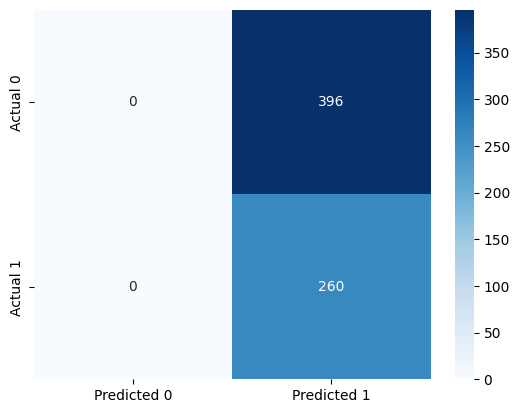

In [46]:
# Performance metrics computation for the optimum decision threshold probability
desired_threshold = thres

y_pred_prob = model.predict_proba(X_test_scaled)[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_test)*100)  

#Computing the ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_test, y_pred_prob)
print("ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');